In [1]:
import os
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# utility methods
def print_space(l):
    assert isinstance(l, int)
    print('-'*l)

def differ_columns(df):
    '''Computes and returns tuple of list of categorical and numerical columns from a dataframe'''
    cat_cols = df.select_dtypes(include=['object']).columns.to_list()
    num_cols = df.select_dtypes(include=np.number).columns.to_list()
    print(f'List of categorical columns: {cat_cols}')
    print_space(40)
    print(f'List of numeric columns: {num_cols}')
    return cat_cols, num_cols

def print_incorrect(df, col):
    for v in df[col]:
        try:
            x = float(v)
            if x == 0:
                print(x)
        except:
            print(v)

def log_transform(df, columns):
    for col in columns:
        if (df[col] == 1.0).all():
            df[f'{col}_log'] = np.log(df[col] + 1)
        else:
            df[f'{col}_log'] = np.log(df[col])
    df.head()

In [3]:
DS_DIR = '../datasets'

In [4]:
USED_CARS_DIR = os.path.join(DS_DIR, 'used_cars_data.csv')

In [5]:
df = pd.read_csv(USED_CARS_DIR)

In [6]:
# view first 5 records
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
# view last 5 records
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [8]:
# remove S.No. column as it is unique id for each instance and doesn't contribute to prediction power
df = df.drop(['S.No.'], axis=1)

df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
# overview dataset
# dtypes | count of null values | count of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [10]:
# view statistical overview of data
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
# view count of null values per column
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

#### Count of null values

* Mileage has 2
* Engine and Power has 46
* Seats has 53

In [12]:
# view count of unique values per column
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [13]:
# view percentage of missing values per column
100*(df.isnull().sum() / len(df))

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

#### Missing percentage

* New_Price has the most missing values of all around 86%
* Price has around 17% missing values

In [14]:
# view count of categorical & numeric features
cat_cols, num_cols = differ_columns(df)

List of categorical columns: ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']
----------------------------------------
List of numeric columns: ['Year', 'Kilometers_Driven', 'Seats', 'Price']


#### Observation:

* But from the data fields like Mileage, Power, Engine, New_Price should be numeric. Since they have some str units they look like categorical.

* Mileage - kmph | Power - bhp | Engine - CC | New_Price - Lakh

In [15]:
# cleaning false categorical features
false_cat_cols = {'Engine': 'CC', 'Mileage': ['km/kg', 'kmpl'], 'Power': 'bhp'}

In [16]:
# viewing count of different units under Mileage <km/kg | kmpl>

kmkg = 0
kmpl = 0

for i in df['Mileage']:
    if str(i).endswith('km/kg'):
        kmkg += 1
    elif str(i).endswith('kmpl'):
        kmpl += 1

print(f'km/kg: {kmkg} | kmpl: {kmpl}')

km/kg: 74 | kmpl: 7177


In [17]:
def convert_to_num(x, col, unit):
    if col == 'Mileage':
        if str(x).endswith(unit[0]):
            val = float(x.split(unit[0])[0].strip())
            return val * 1.40
        elif str(x).endswith(unit[1]):
            return float(x.split(unit[1])[0].strip())
        else:
            return x
    
    else:
        if str(x).endswith(unit):
            try:
                val = float(x.split(unit)[0].strip())
                return val
            except:
                val = x.split(unit)[0].strip()
                if val == 'null':
                    return np.nan
                return val
        else:
            return x

df_1 = df.copy()
for col, unit in false_cat_cols.items():
    df_1[col] = df_1[col].apply(lambda x: convert_to_num(x, col, unit))

In [18]:
print('Previous DF')
df.head()

Previous DF


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [19]:
print('New DF')
df_1.head()

New DF


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### Categorical features

In [20]:
cat_cols, num_cols = differ_columns(df_1)

List of categorical columns: ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price']
----------------------------------------
List of numeric columns: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [21]:
# viewing unique Location
df_1['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [22]:
# viewing unique Fuel_Type
df_1['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [23]:
# viewing unique Transmission
df_1['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
# viewing unique Owner_Type
df_1['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

#### Observation

* All the categorical features look good in terms of values
* Name can be feature engineered into Brand and Model

### Feature Engineering

#### Observation

* Year is not helpful by itself.
* But Year can be used to get the information about age of car
* Create a new column Car_Age from Year

In [25]:
df_1['Car_Age'] = date.today().year - df_1['Year']

df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,9


#### Observation

* Name is not useful feature by itself
* Name contains the brand of the car and the model
* The first part of Name represents the Brand
* The second and third part of Name can be concatenated into Model
* Create new columns Brand and Model

In [26]:
df_1['Brand'] = df_1['Name'].str.split().str.get(0)

df_1['Model'] = df_1['Name'].str.split().str.get(1) + df_1['Name'].str.split().str.get(2)

In [27]:
df_1[['Name', 'Brand', 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [28]:
# check if any value is empty

# df_1[df_1['Brand | Model'] == '']

In [29]:
df_1['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

#### Observation

* Under Brand there are some problems
* Isuzu & ISUZU are same can be called as Isuzu
* Land should Land Rover

In [30]:
# view incorrect brands

# searchBrands = ['Isuzu', 'ISUZU', 'Land']
# df_1[df_1['Brand'].str.contains('|'.join(searchBrands))].head()

In [31]:
df_1['Brand'].replace({'ISUZU': 'Isuzu', 'Land': 'Land Rover'}, inplace=True)

In [32]:
df_1[df_1['Brand'] == 'Land']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model


In [33]:
df_1[df_1['Brand'] == 'ISUZU']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model


In [34]:
# drop Name column
df_2 = df_1.drop(['Name'], axis=1)
df_2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75,12,Maruti,WagonR
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,7,Hyundai,Creta1.6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,11,Honda,JazzV
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,10,Maruti,ErtigaVDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,9,Audi,A4New


## Data Cleaning and Imputation

In [35]:
len(df_2)

7253

In [36]:
df_2.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

In [37]:
df_2[df_2['Model'].isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
7067,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,NaN,17,OpelCorsa,NaN


#### Observation

* This entry can be dropped as this is the only car with this brand

In [38]:
# drop rows where Model is nan

df_2 = df_2[df_2['Model'].notna()]

len(df_2)

7252

In [39]:
df_2[df_2['Mileage'].isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.00,6,Mahindra,EVerito
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,11,Toyota,Prius2009-2016


In [40]:
# impute NaN Mileage

df_2['Mileage'].fillna(0.0, inplace=True)
df_2['Mileage'] = df_2['Mileage'].apply(lambda x: df_2['Mileage'].mean() if x == 0 else x)
df_2[df_2['Mileage'] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model


In [41]:
df_2[df_2['Engine'].isna()].head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
194,Ahmedabad,2007,60006,Petrol,Manual,First,18.236513,NaN,NaN,NaN,NaN,2.95,15,Honda,City1.5
208,Kolkata,2010,42001,Petrol,Manual,First,16.100000,NaN,NaN,NaN,NaN,2.11,12,Maruti,Swift1.3
733,Chennai,2006,97800,Petrol,Manual,Third,16.100000,NaN,NaN,NaN,NaN,1.75,16,Maruti,Swift1.3
749,Mumbai,2008,55001,Diesel,Automatic,Second,18.236513,NaN,NaN,NaN,NaN,26.50,14,Land Rover,RoverRange
1294,Delhi,2009,55005,Petrol,Manual,First,12.800000,NaN,NaN,NaN,NaN,3.20,13,Honda,City1.3


In [42]:
# impute nan engine, power and seats with median

df_2['Engine'] = df_2.groupby(['Brand', 'Model'])['Engine'].transform(lambda x: x.fillna(x.median()))
df_2['Power'] = df_2.groupby(['Brand', 'Model'])['Power'].transform(lambda x: x.fillna(x.median()))
df_2['Seats'] = df_2.groupby(['Brand', 'Model'])['Seats'].transform(lambda x: x.fillna(x.median()))

In [43]:
df_2.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 18
Power                  63
Seats                  22
New_Price            6246
Price                1233
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

#### Observation

* Even after imputation using groupby Model and Brand there are some NaN under Engine, Power and Seats
* Either these entries can be removed if more data on similar models and brands are available
* Or they can be imputed globally using mean

In [44]:
# imputing globally

df_2['Engine'].fillna(df_2['Engine'].mean(), inplace=True)
df_2['Power'].fillna(df_2['Power'].mean(), inplace=True)
df_2['Seats'].fillna(df_2['Seats'].median(), inplace=True)

In [45]:
df_2.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6246
Price                1233
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

#### Observation

* drop all the entries where Price is null | NaN as those cannot be used for training
* drop New_Price column as it is mostly null | NaN

In [46]:
df_2 = df_2[df_2['Price'].notna()]
df_2 = df_2.drop(['New_Price'], axis=1)

In [47]:
df_2.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Brand                0
Model                0
dtype: int64

#### Observation

* drop Year column as we can use Car_Age instead

In [48]:
df_3 = df_2.drop(['Year'], axis=1)

In [49]:
df_3.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,12,Maruti,WagonR
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New


## Statistical Inference

In [50]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.000,53000.000000,73000.00,6500000.000
Mileage,6019.0,18.448500,4.472151,6.40,15.400,18.236513,21.10,46.956
Engine,6019.0,1620.833734,600.232154,72.00,1198.000,1493.000000,1984.00,5998.000
Power,6019.0,112.790940,53.551783,34.20,74.915,97.600000,138.10,560.000
Seats,6019.0,5.277122,0.806644,0.00,5.000,5.000000,5.00,10.000
Price,6019.0,9.479468,11.187917,0.44,3.500,5.640000,9.95,160.000
Car_Age,6019.0,8.641801,3.269742,3.00,6.000,8.000000,11.00,24.000


In [51]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6019 non-null   float64
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   Price              6019 non-null   float64
 10  Car_Age            6019 non-null   int64  
 11  Brand              6019 non-null   object 
 12  Model              6019 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 658.3+ KB


## Save cleaned and engineered dataframe as csv

In [52]:
df_3.to_csv(os.path.join(DS_DIR, 'clean_used_cars.csv'), index=False)

## Visualization

In [53]:
data = pd.read_csv(os.path.join(DS_DIR, 'clean_used_cars.csv'))

data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,12,Maruti,WagonR
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New


In [54]:
data.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Brand                0
Model                0
dtype: int64

In [74]:
cat_cols, num_cols = differ_columns(data)

List of categorical columns: ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
----------------------------------------
List of numeric columns: ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age', 'Price_log', 'Kilometers_Driven_log']


### Univariate Analysis

#### Observation

* Numeric features can be visualized using histogram and box plots
* Categorical features can be visualized using count plot

Kilometers_Driven
Skew: 58.72


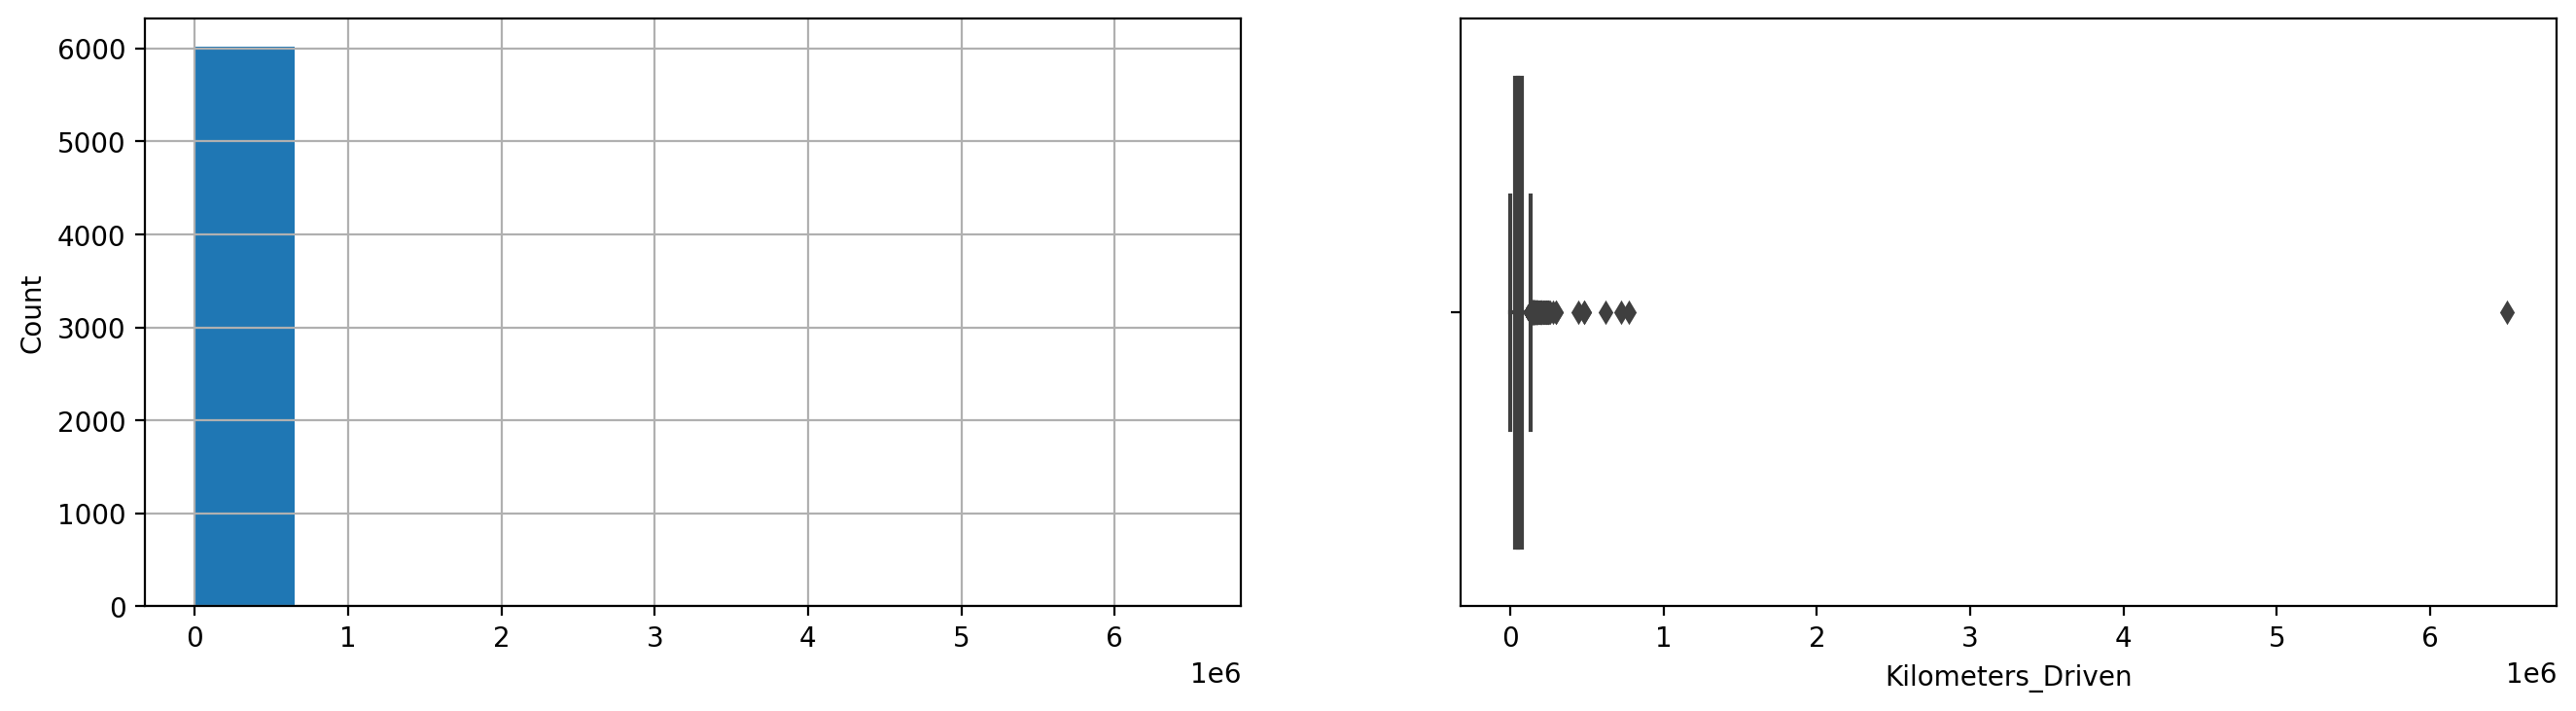

Mileage
Skew: 0.91


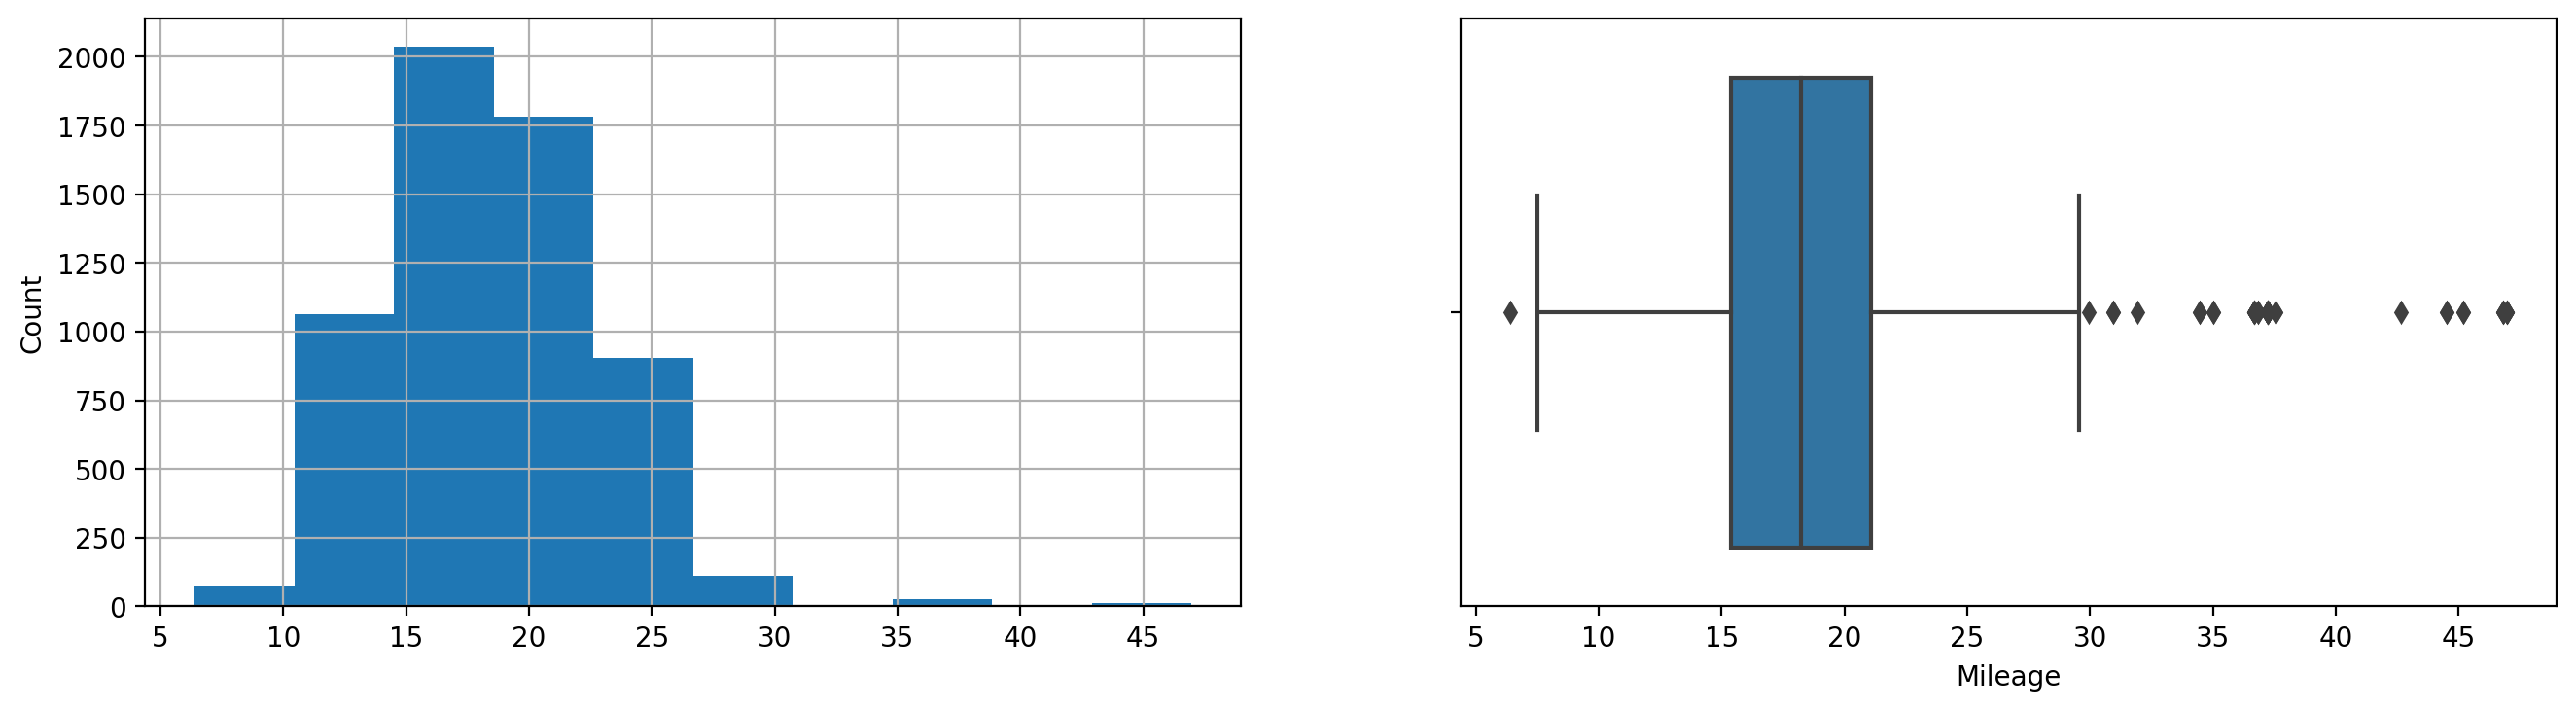

Engine
Skew: 1.42


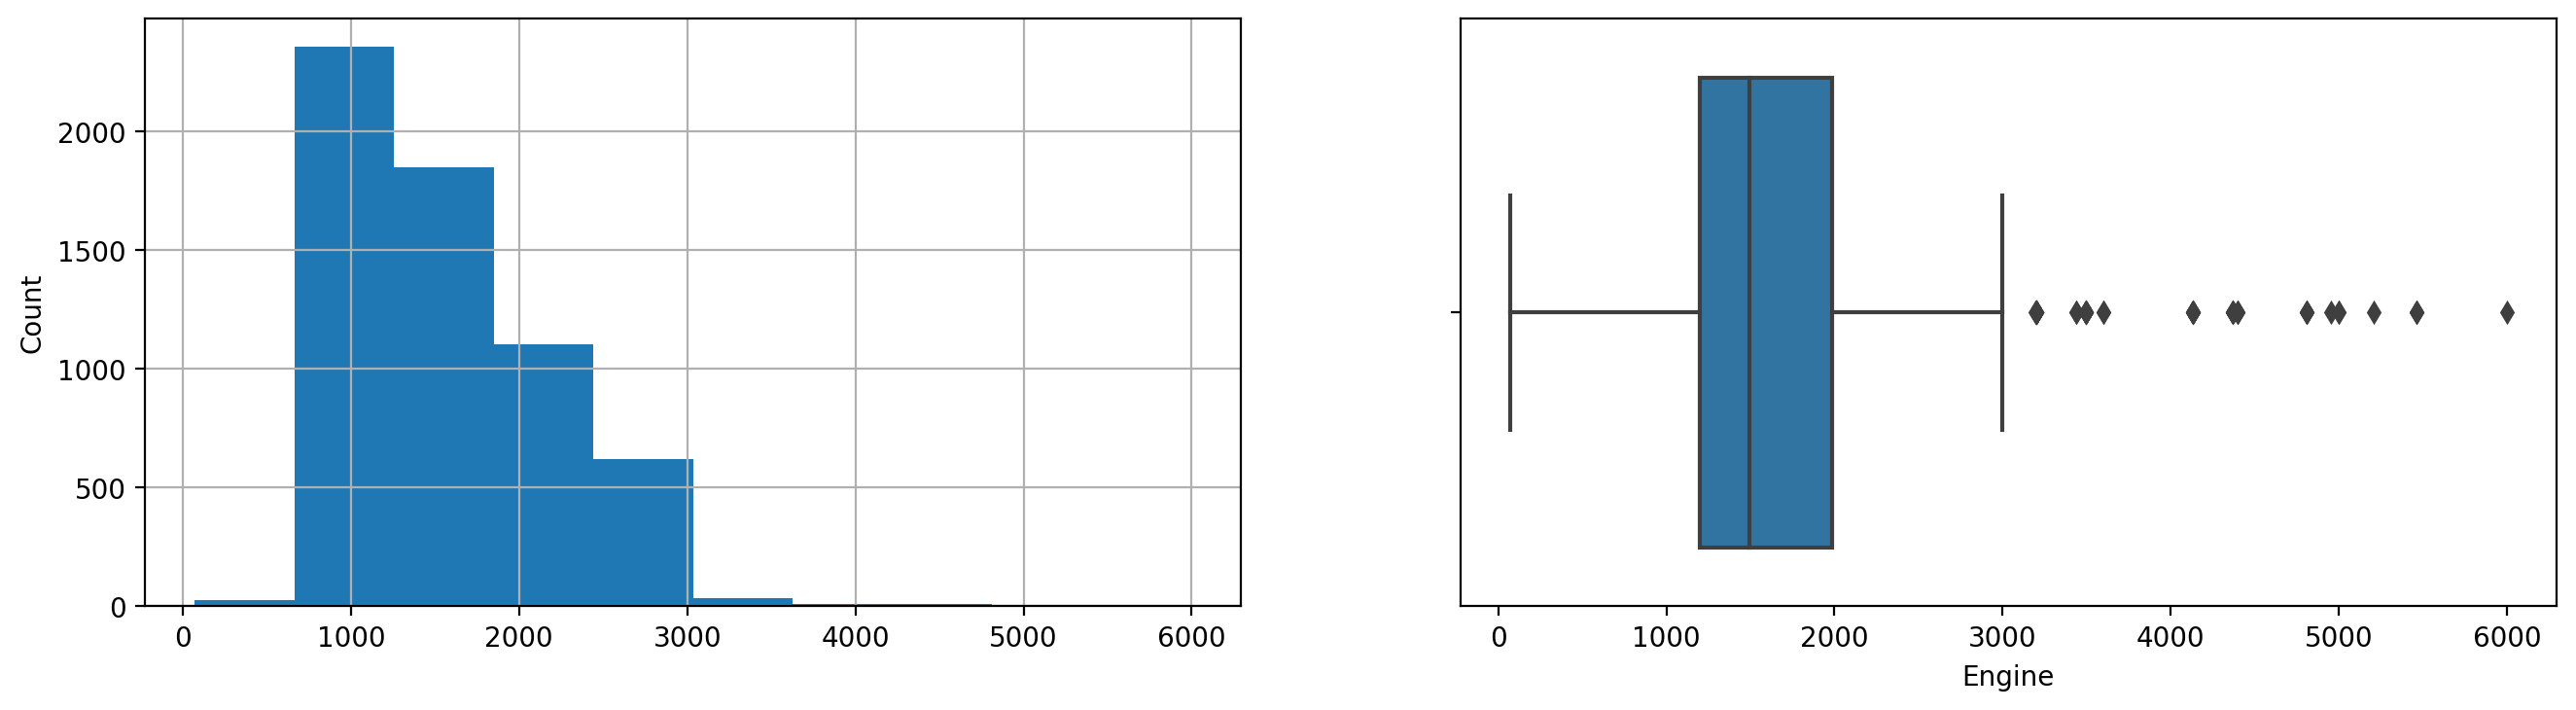

Power
Skew: 1.93


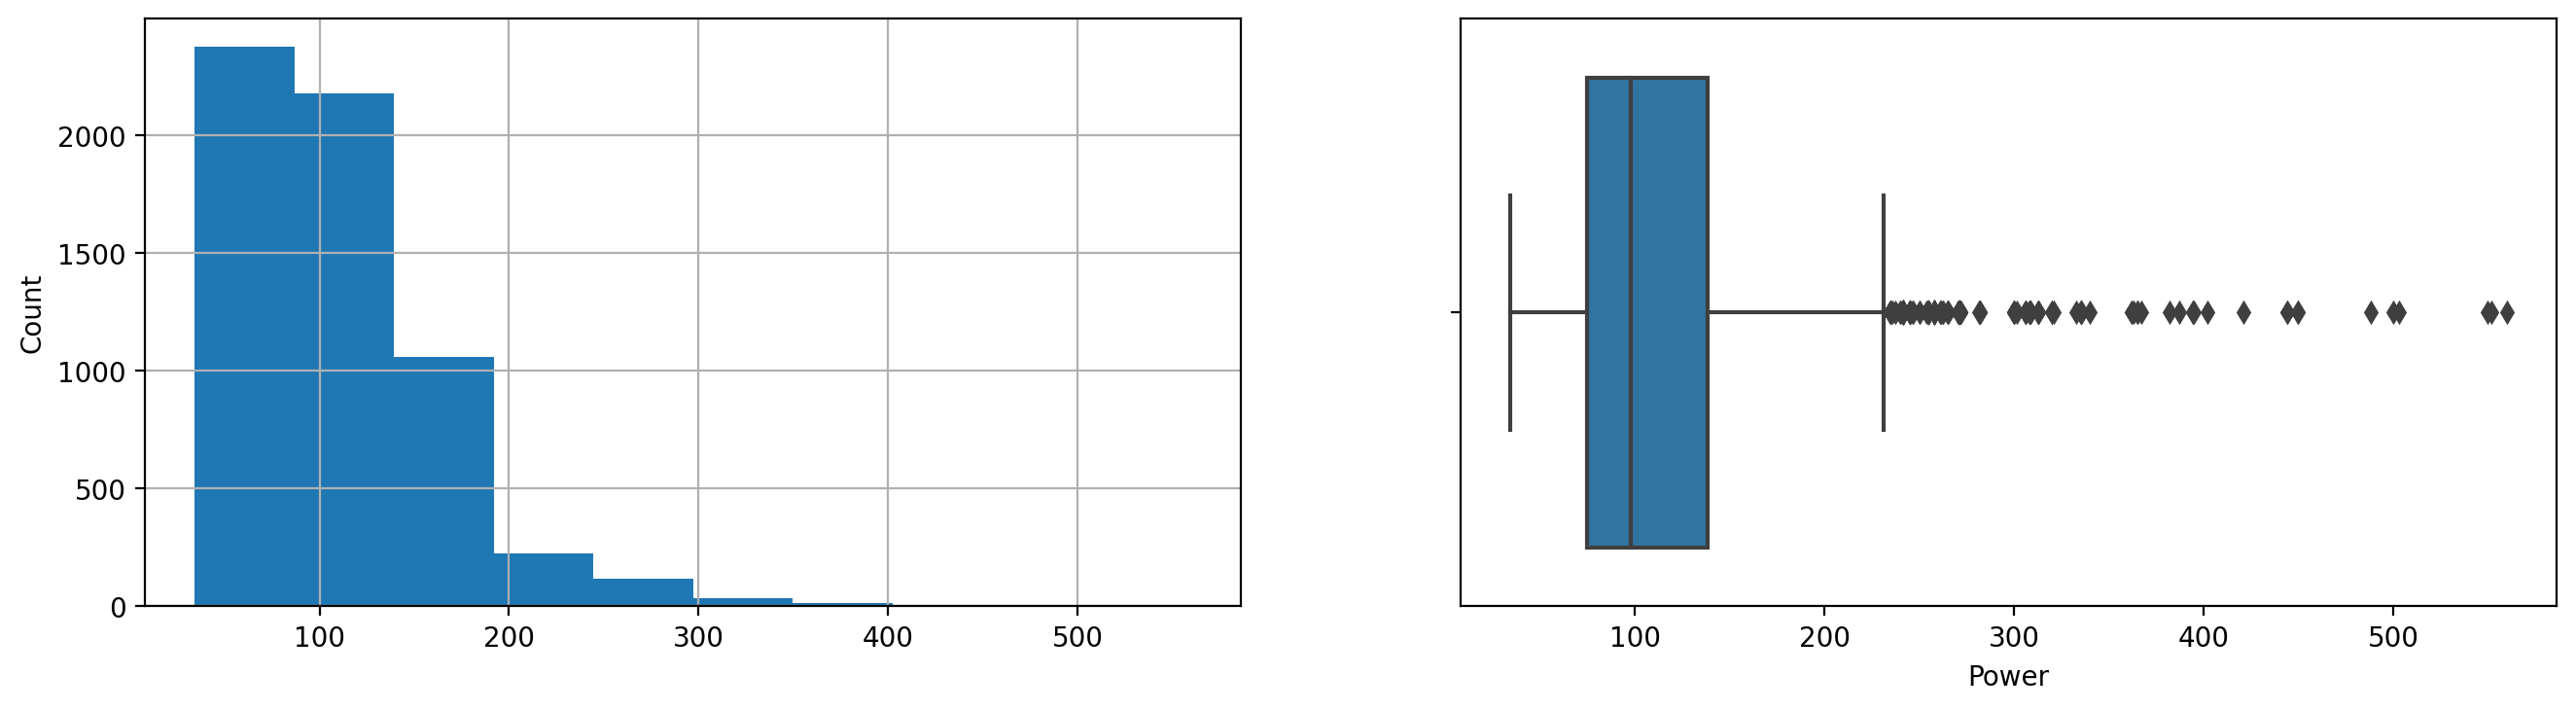

Seats
Skew: 1.85


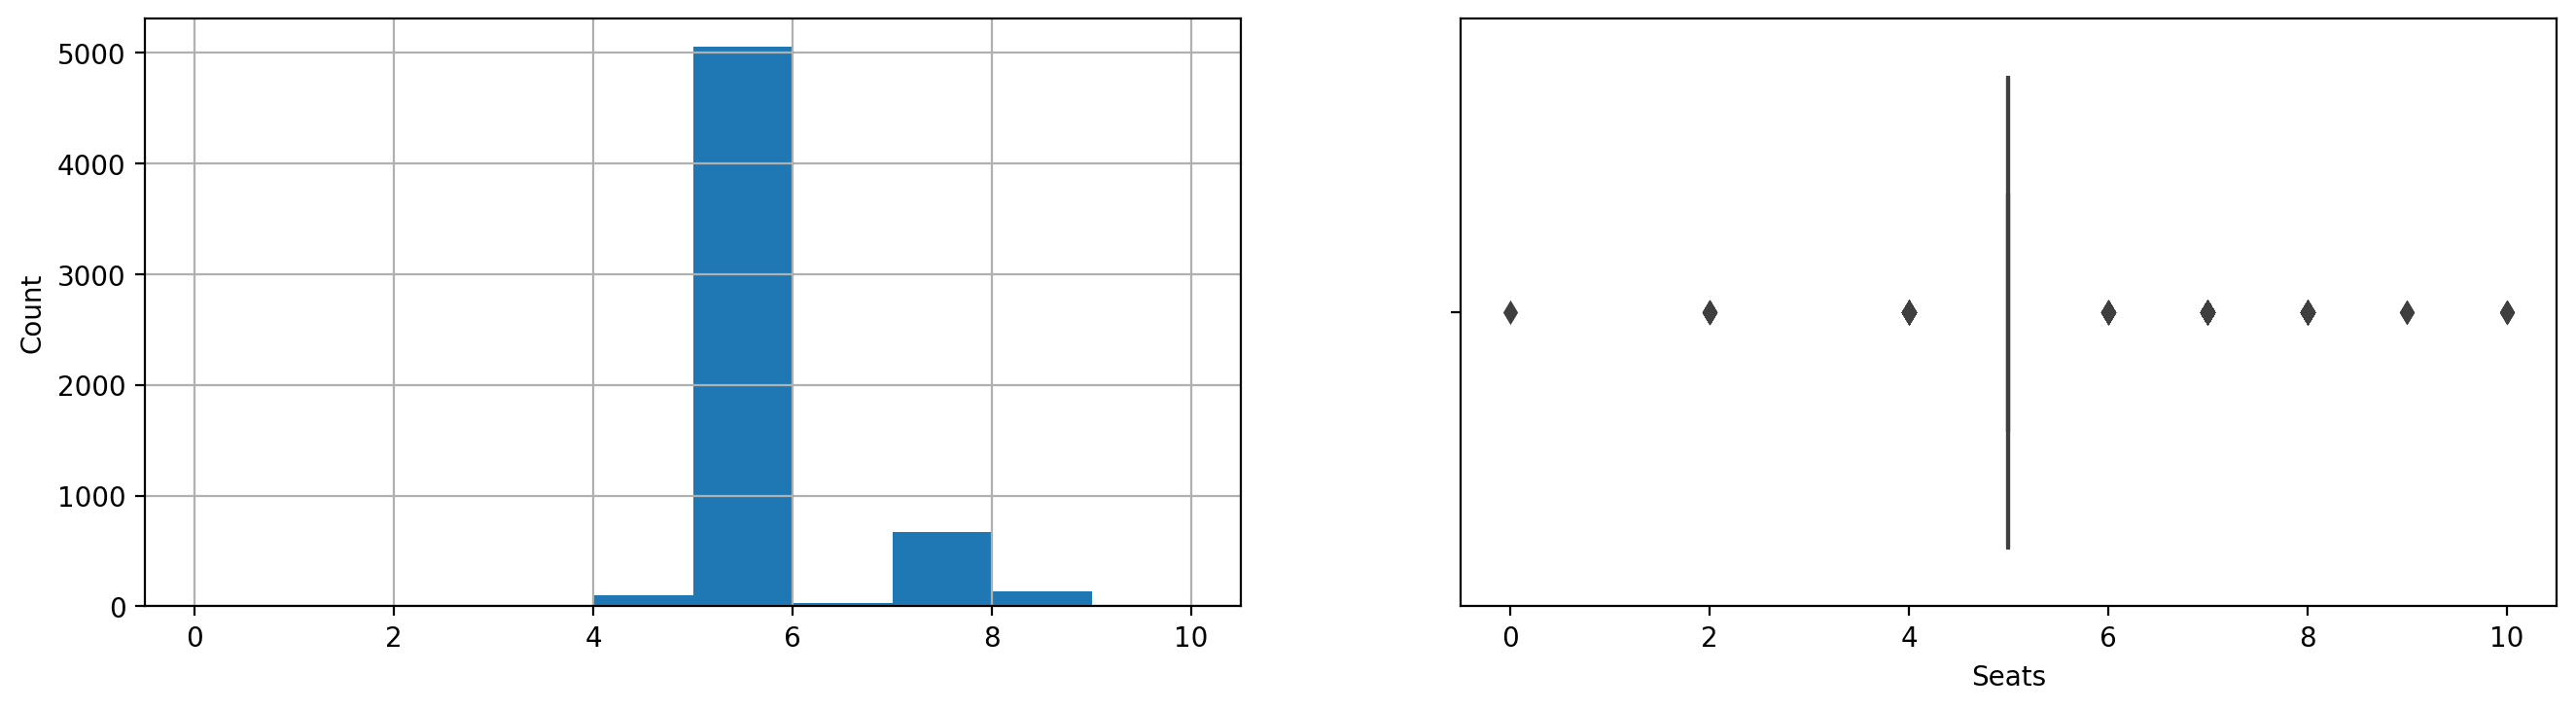

Price
Skew: 3.34


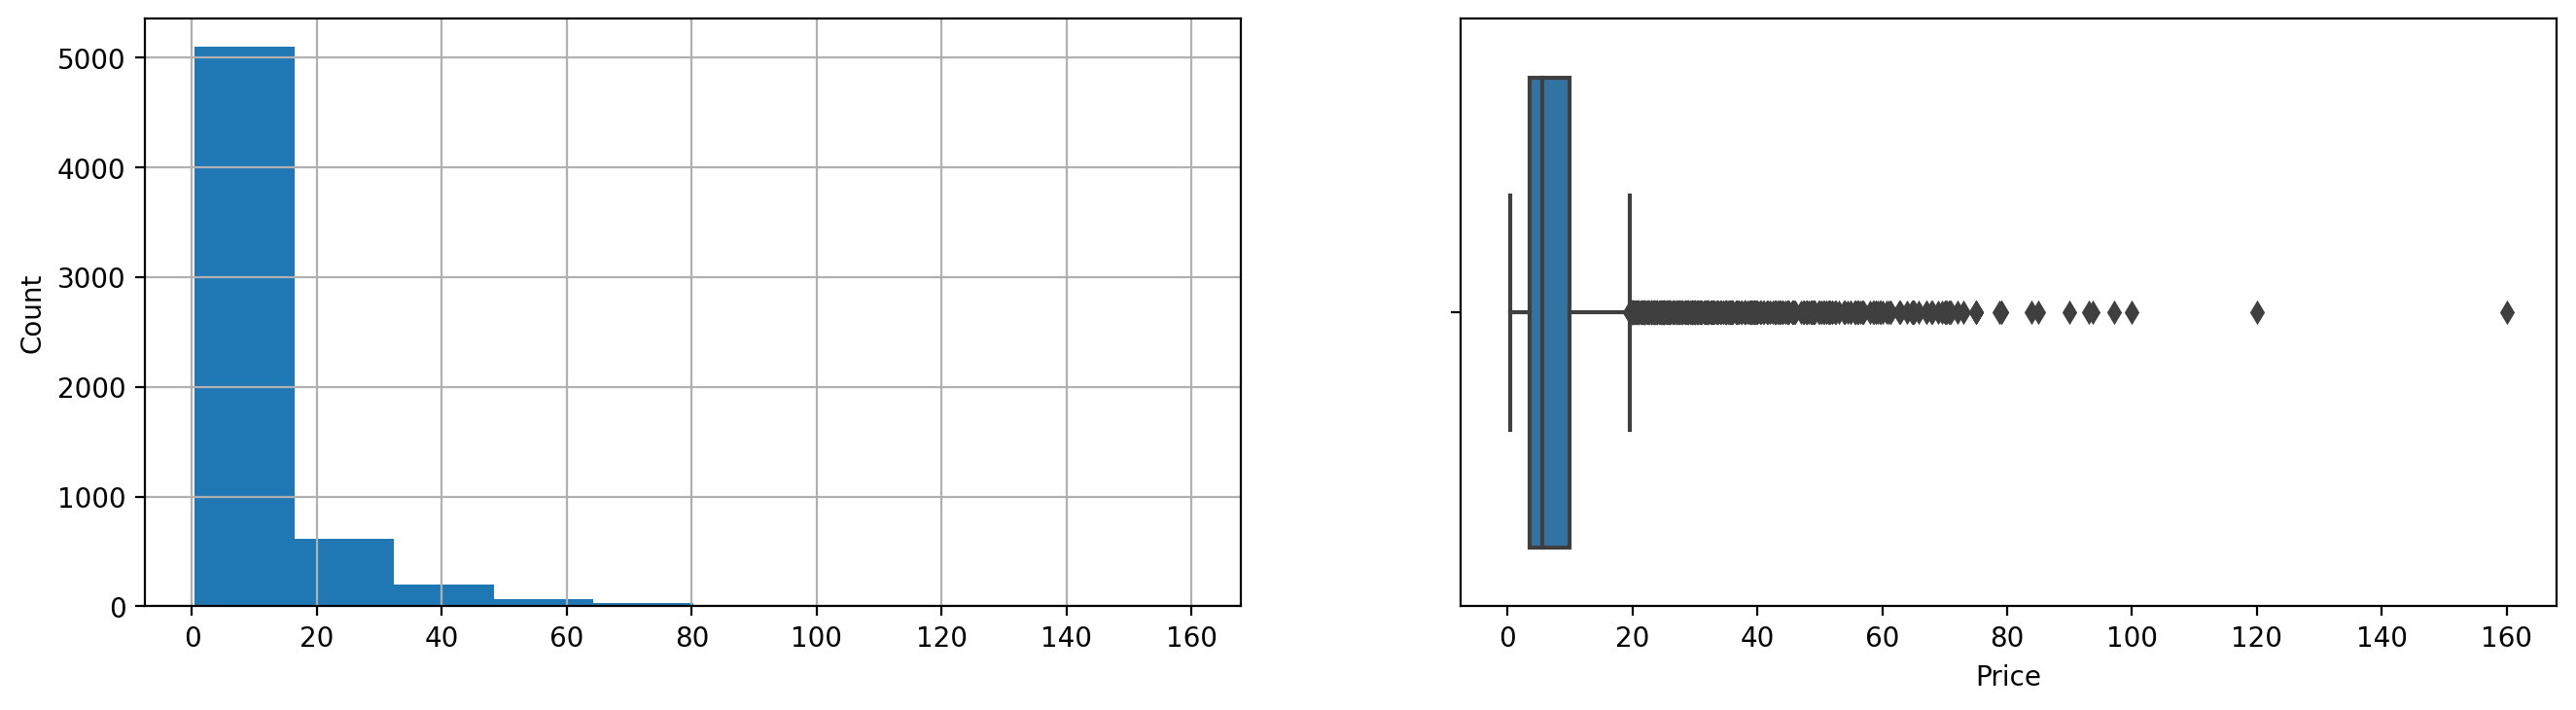

Car_Age
Skew: 0.85


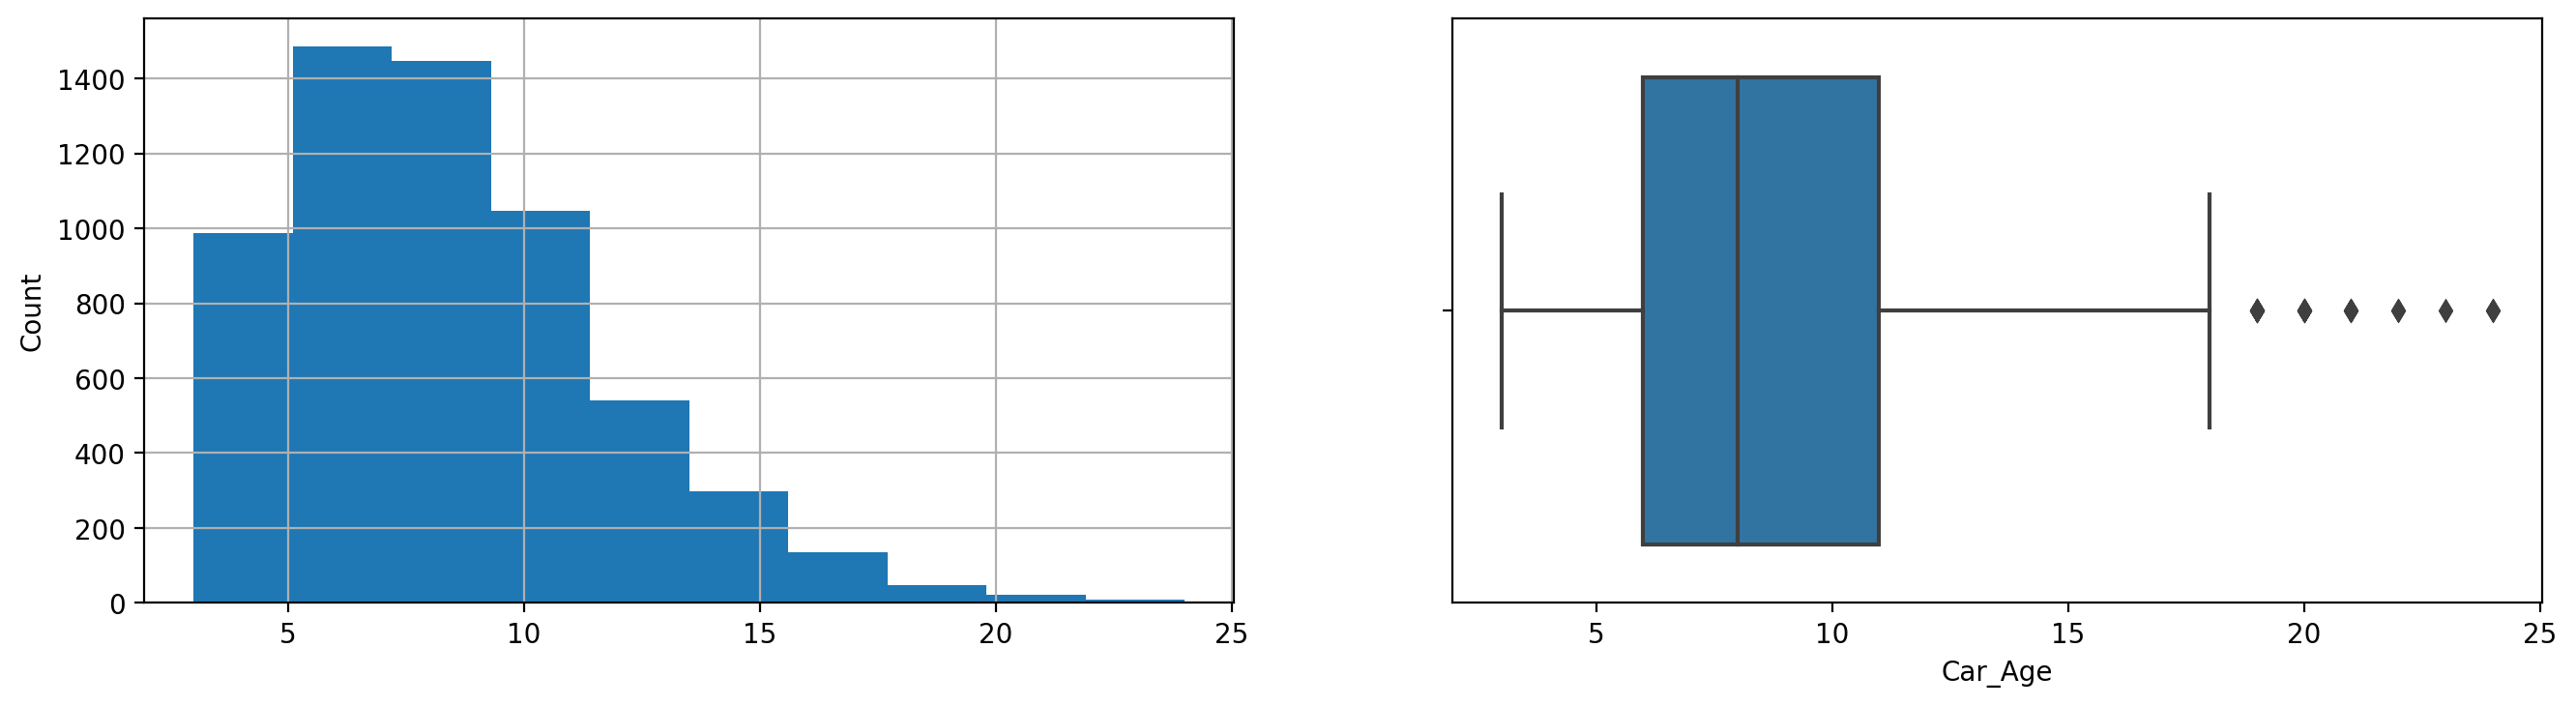

In [56]:
# visualizing univariate numeric features

for col in num_cols:
    print(col)
    print(f'Skew: {round(data[col].skew(), 2)}')
    plt.figure(figsize=(16, 4), dpi=200)
    plt.subplot(1, 2, 1)
    data[col].hist()
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

#### Observation

* Price is right skewed
* Kilometers_Driven is right skewed

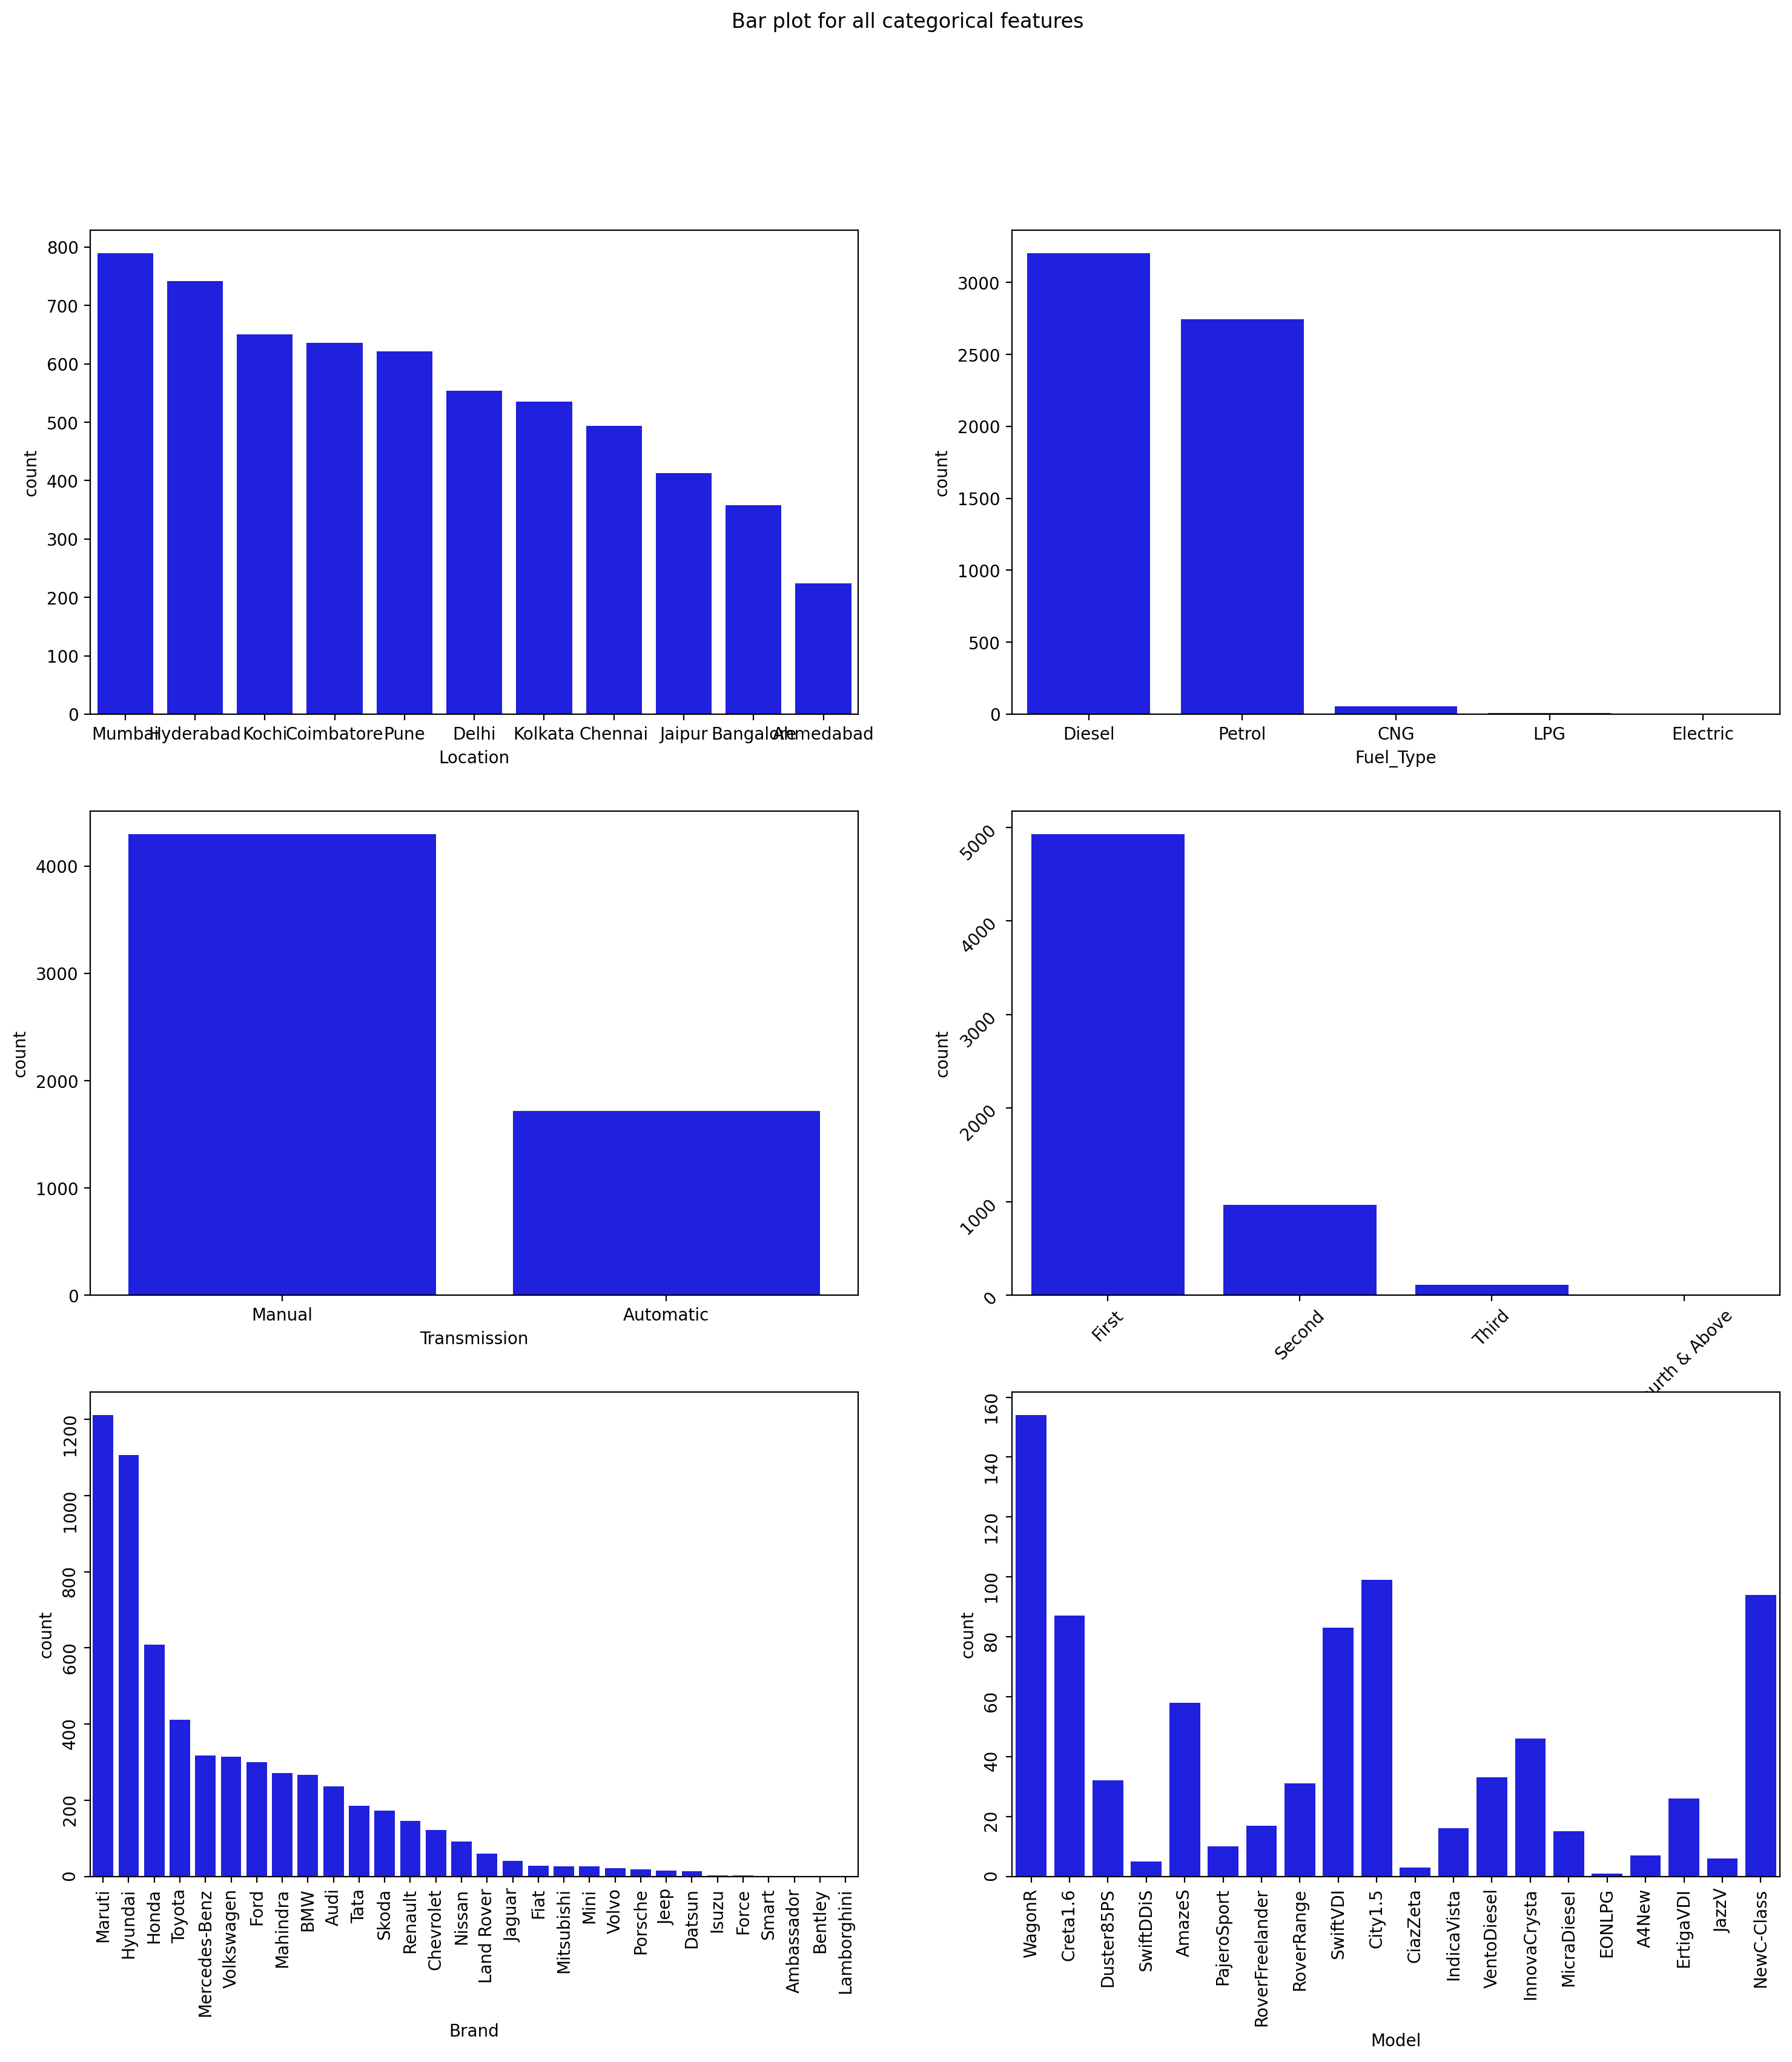

In [57]:
# visualizing categorical features

fig, axes = plt.subplots(3, 2, figsize=(18, 18), dpi=200)
fig.suptitle('Bar plot for all categorical features')
i, j = 0, 0
for col in cat_cols:
    sns.countplot(
        ax=axes[i, j], 
        x=col, 
        data=data, 
        color='blue', 
        order= (data[col] if col != 'Model' else data[col].head(20)).value_counts().index
    )
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1
    
axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)

#### Observation

* #Cars (desc): Mumbai > Hyderabad > Kochi > Coimbatore ...

* #Diesel cars > #Petrol cars: diesel cars may be performing better

* Most of the cars have Manual transmission

* Most of the cars are first owned: buyers prefer first hand cars

* Maruti has highest number of cars followed by Hyundai

* WagonR is the most common model choice

### Fixing skewness

* Price and Kilometers_Driven both were skewed
* Use log transform to normalize them and remove skewness
* Create new columns called Price_log and Kilometers_Driven_log

In [58]:
log_transform(data, ['Price', 'Kilometers_Driven'])

In [59]:
data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,Price_log,Kilometers_Driven_log
0,Mumbai,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,12,Maruti,WagonR,0.559616,11.184421
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6,2.525729,10.621327
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV,1.504077,10.736397
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI,1.791759,11.373663
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New,2.875822,10.613246


<AxesSubplot:xlabel='Kilometers_Driven_log', ylabel='Density'>

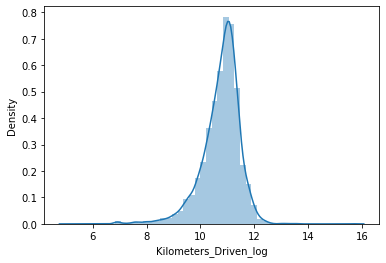

In [60]:
# visualize log transformed columns

sns.distplot(data['Kilometers_Driven_log'], axlabel='Kilometers_Driven_log')

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

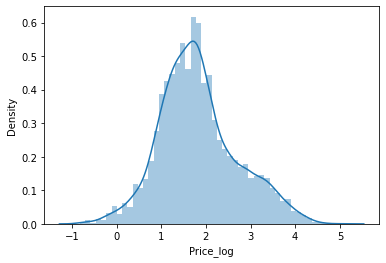

In [61]:
sns.distplot(data['Price_log'], axlabel='Price_log')

### Bivariate Analysis

* For numerical features Pair plot and Scatter plots can be used

* For categorical features:
    * Stacked bar chart can be used if output variable is categorical
    * Bar plots can be used if output variable is numeric/continuous

#### Observation

* In this case the output variable is Price i.e. continuous so Pair plot can be used

<Figure size 2800x3600 with 0 Axes>

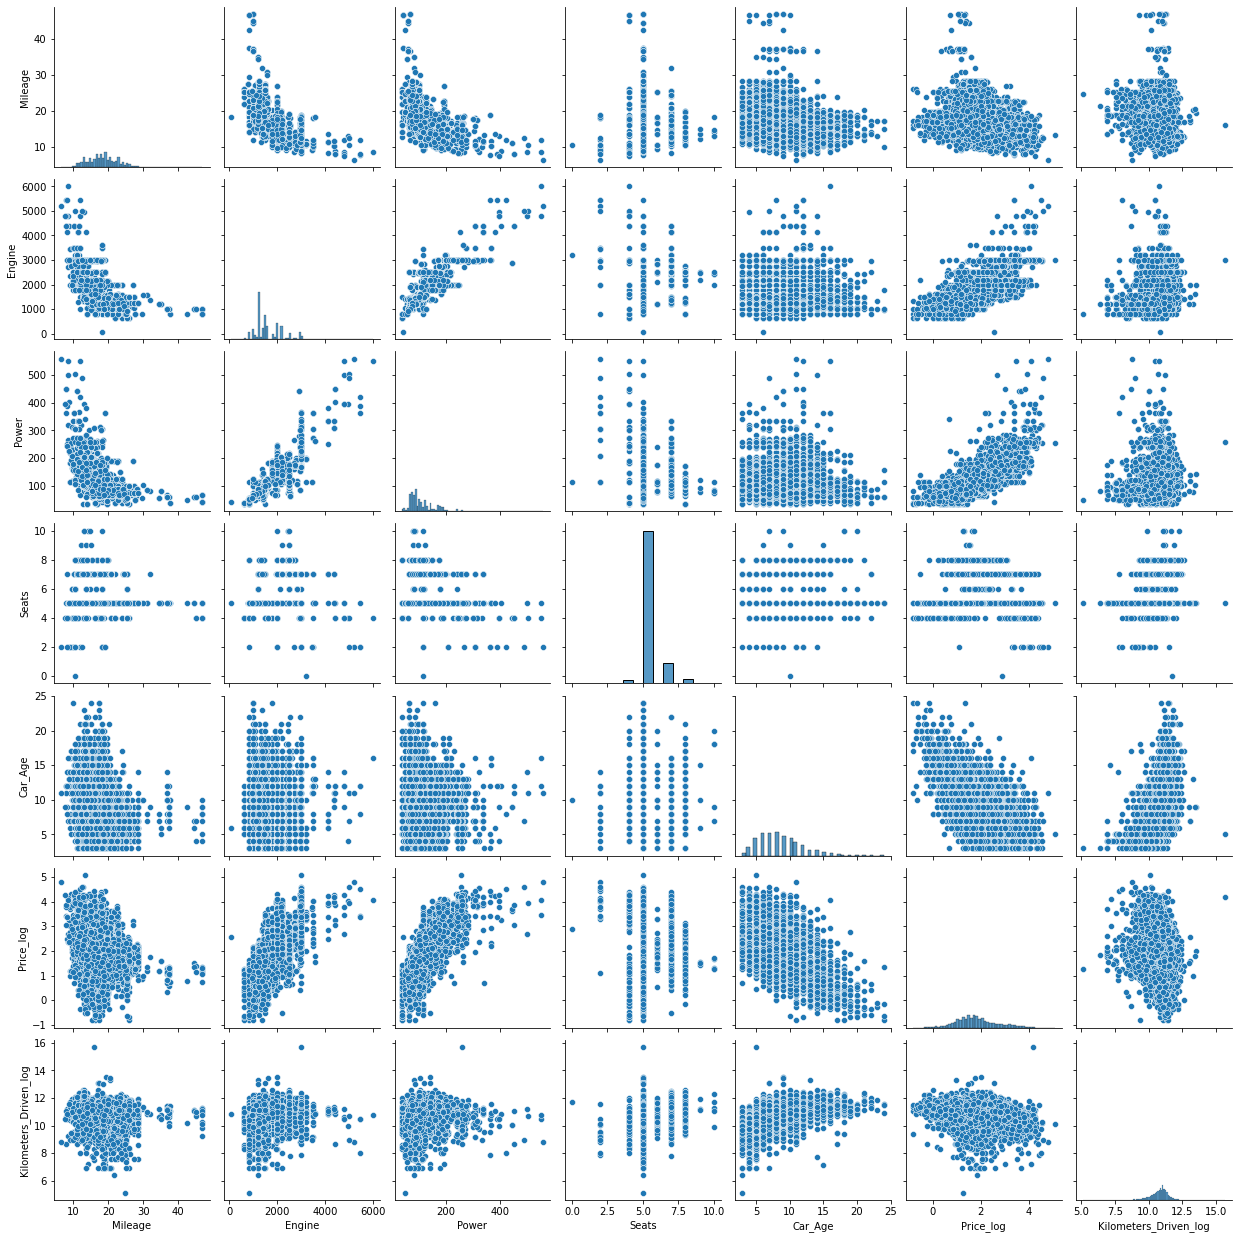

In [63]:
plt.figure(figsize=(14, 18), dpi=200)
sns.pairplot(data=data.drop(['Kilometers_Driven', 'Price'], axis=1))
plt.show()

#### Observation

* Car_Age has positive correlation with Mileage
* Car_Age has negative correlation with Kilometers_Driven_log
* Mileage is negatively correlated to Power
* Car_Age has negative correlation with Price_log, Recent cars are higher in price
* Enigne and Power have positive correlation with Price_log

#### Observation

* A bar plot can be used to show the relationship between categorical features and continuous features

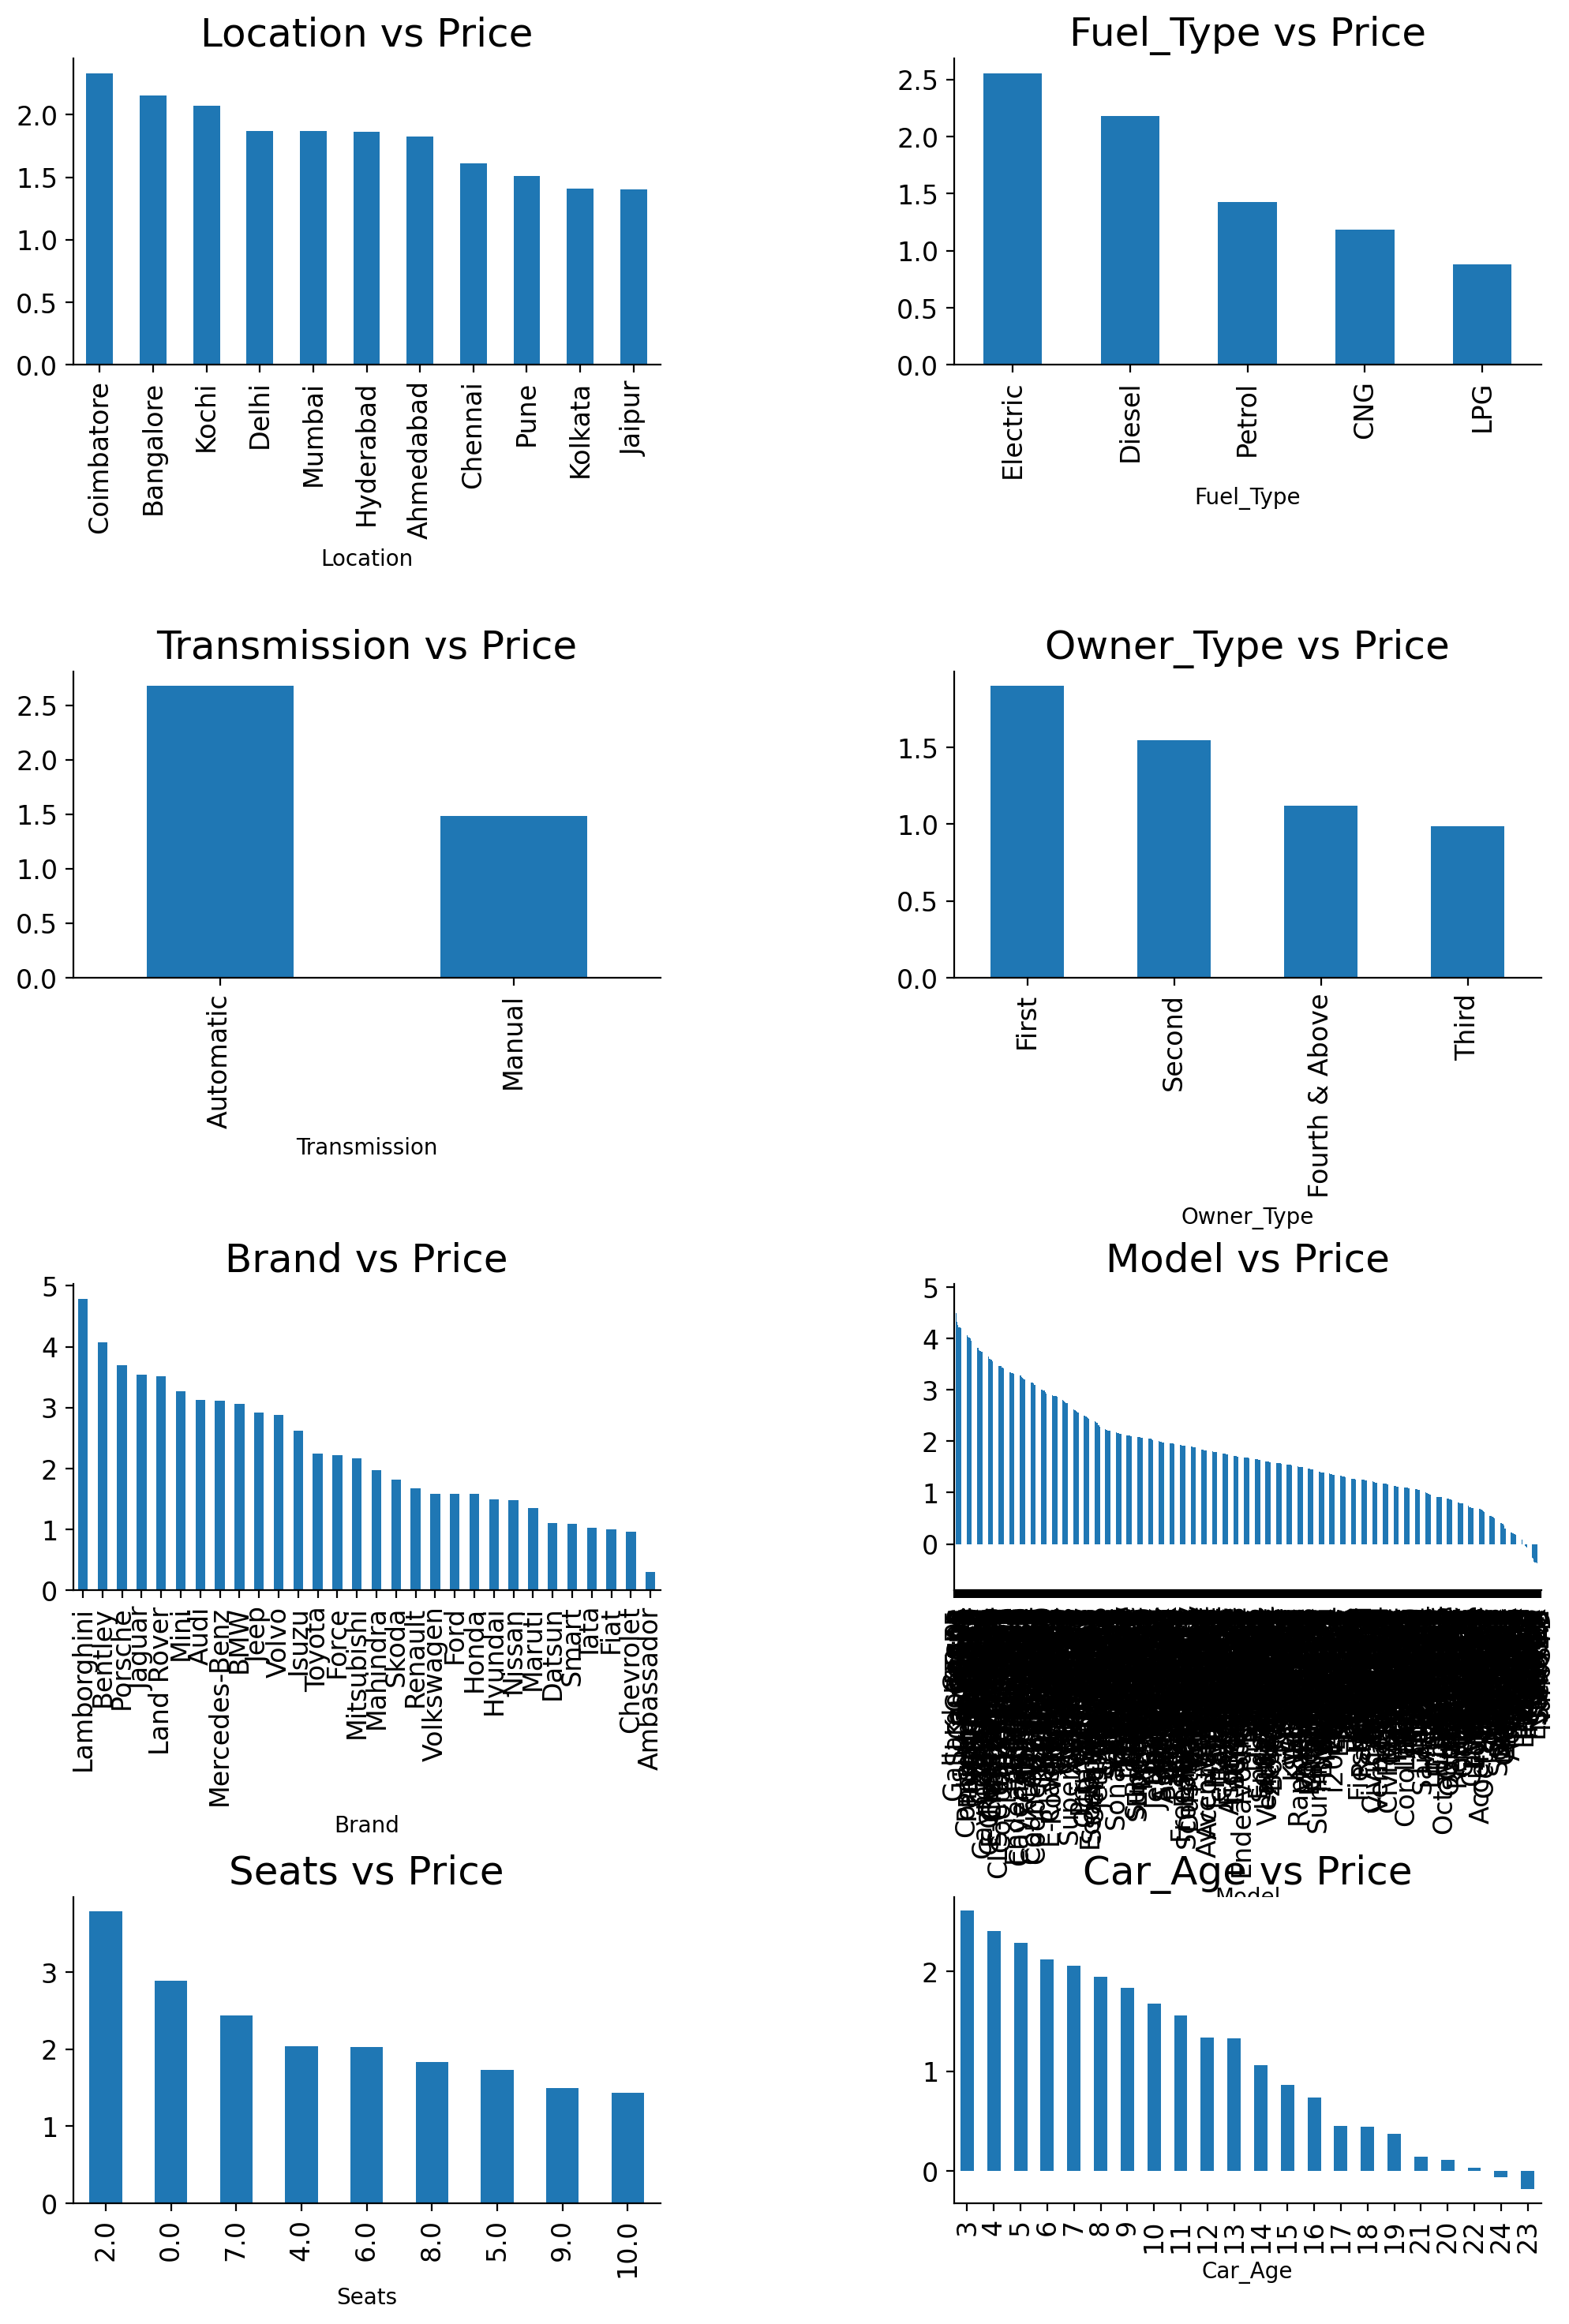

In [76]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18), dpi=200)

columns = cat_cols.copy()
columns.extend(['Seats', 'Car_Age'])
i, j = 0, 0

for col in columns:
    data.groupby(col)['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[i][j], fontsize=12)
    axarr[i][j].set_title(f'{col} vs Price', fontsize=18)
    
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=0.5)
sns.despine()

#### Observation

* The Price is higher in Coimbatore and lesser in Kolkata and Jaipur
* Automatic cars are costlier than Manual
* Electric and Diesel cars have similar high Price and LPG cars are cheapest
* First_owned cars are costlier
* Thrid_owned cars are less costlier than fourth_owned and above
* Lamborghini is the most expensive brand
* Gallardocoupe is the most expensive model
* 2 seater has the highest price followed by 7 seater
* The latest models are higher in cost

### Multivariate analysis

* Heat map can be used
* It gives the correlation between different variables

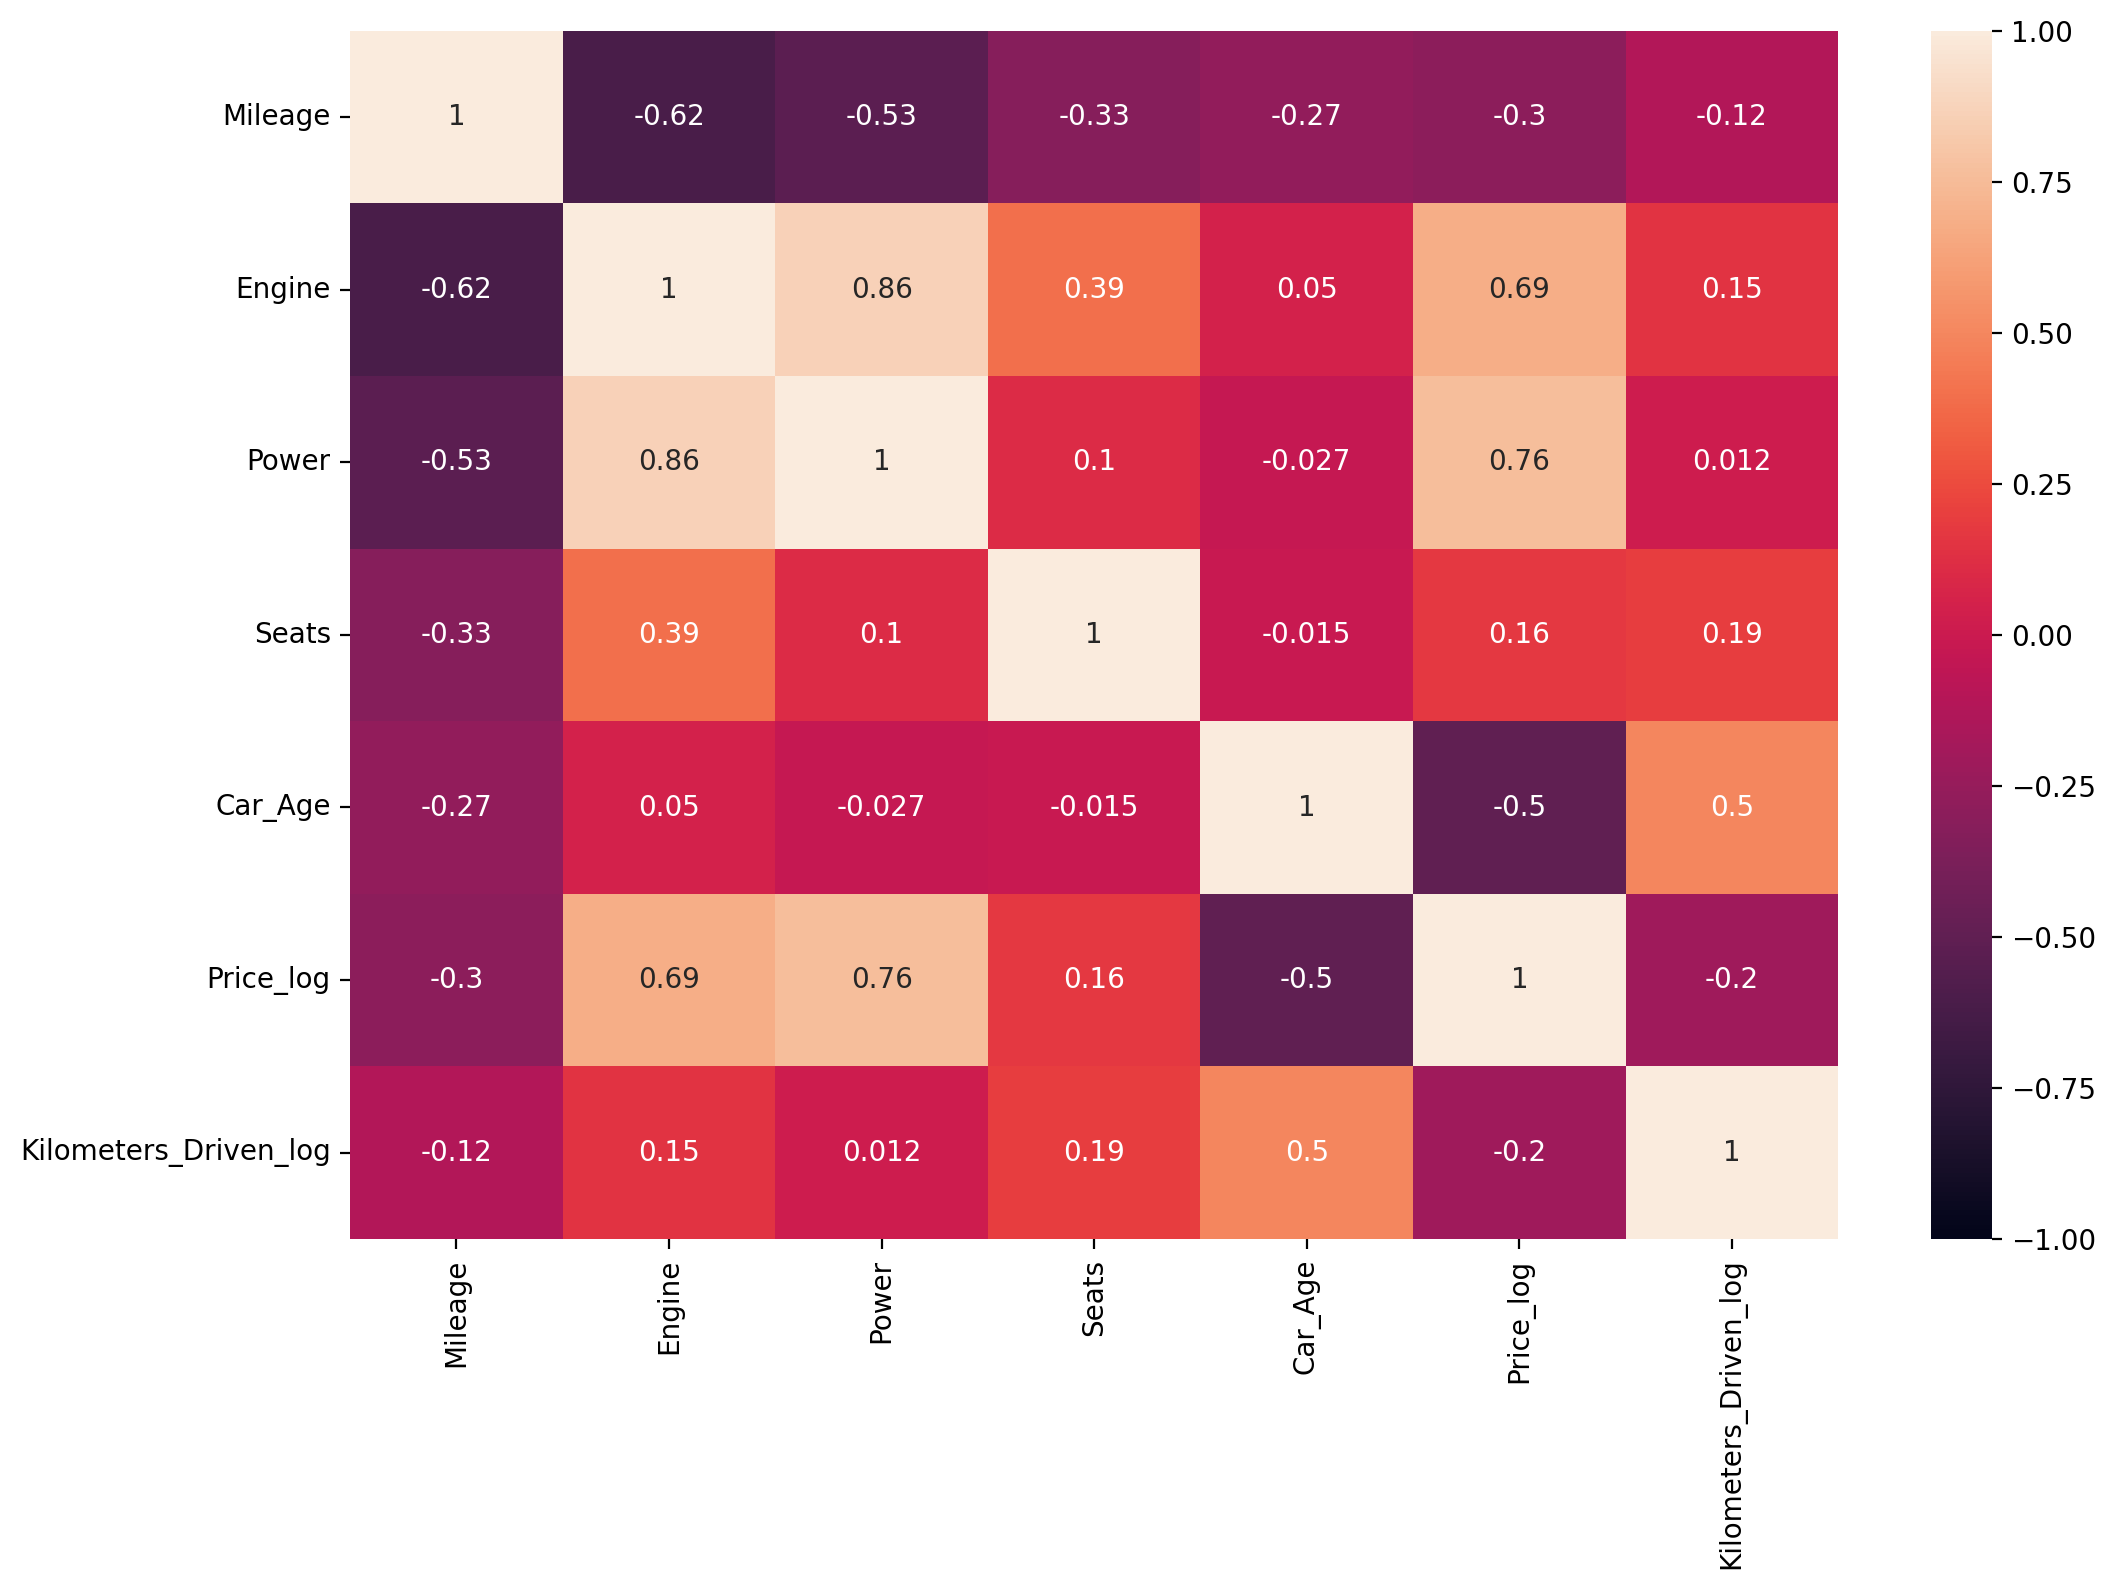

In [78]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(data.drop(['Kilometers_Driven', 'Price'], axis=1).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

#### Observation

* Engine has the highest correlation to Power 0.86
* Price has positive correlation to Engine 0.69 as well as Power 0.76
* Mileage has negative correlation to Engine -0.62, Power -0.53 and Price -0.3
* Car_Age has negative correlation to Price -0.5
* Car_Age has positive correlation to Kilometers_Driven 0.5

In [79]:
data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,Price_log,Kilometers_Driven_log
0,Mumbai,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,12,Maruti,WagonR,0.559616,11.184421
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6,2.525729,10.621327
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV,1.504077,10.736397
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI,1.791759,11.373663
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New,2.875822,10.613246


In [80]:
df = data.drop(['Kilometers_Driven', 'Price'], axis=1)

In [82]:
# save df as csv
df.to_csv(os.path.join(DS_DIR, 'train_used_cars.csv'), index=False)

## Conclusion of EDA

* Most of the customers prefer 2 seater hence the price of 2 seater is higher than others
* The price of the car decreases as the age increases
* Customer prefer to purchase first owned cars than others
* Third_owned cars are cheaper than fourth_owned and above
* Due to increase in fuel price customer prefers to purchase electric cars
* Automatic transmission is easier than manual so customers prefer automatic cars hence higher price